In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
plt.show()

Analysing City.csv dataset

In [2]:
city=pd.read_csv('city.csv')

In [3]:
city.head(4)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"


In [4]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


population and Users are object types data which i converted in to numeric

In [5]:
city['Users'] = city['Users'].str.replace(',', '').astype(float)
city['Population'] = city['Population'].str.replace(',', '').astype(float)

In [6]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        20 non-null     object 
 1   Population  20 non-null     float64
 2   Users       20 non-null     float64
dtypes: float64(2), object(1)
memory usage: 608.0+ bytes


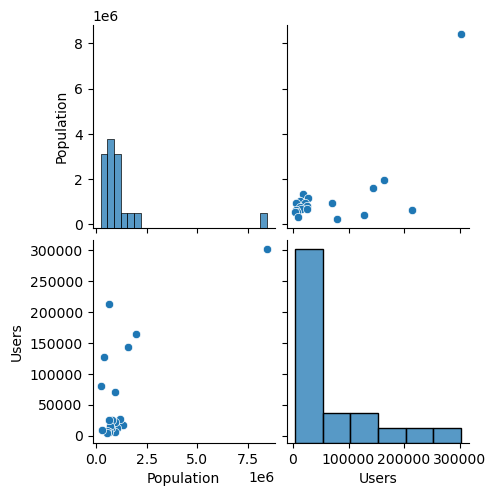

In [7]:
#overview of data to find a relation

sns.pairplot(city)


#could not establish a relation between Population and users
#there is no significant relationship between users and population

In [8]:
#percentage of user per city(Coverstion rate)
city['User_per']=city['Users']*100/city['Population']
city.head()

,City,Population,Users,User_per
0,NEW YORK NY,8405837.0,302149.0,3.594514
1,CHICAGO IL,1955130.0,164468.0,8.412126
2,LOS ANGELES CA,1595037.0,144132.0,9.036279
3,MIAMI FL,1339155.0,17675.0,1.319862
4,SILICON VALLEY,1177609.0,27247.0,2.313756


<AxesSubplot:xlabel='Users', ylabel='City'>

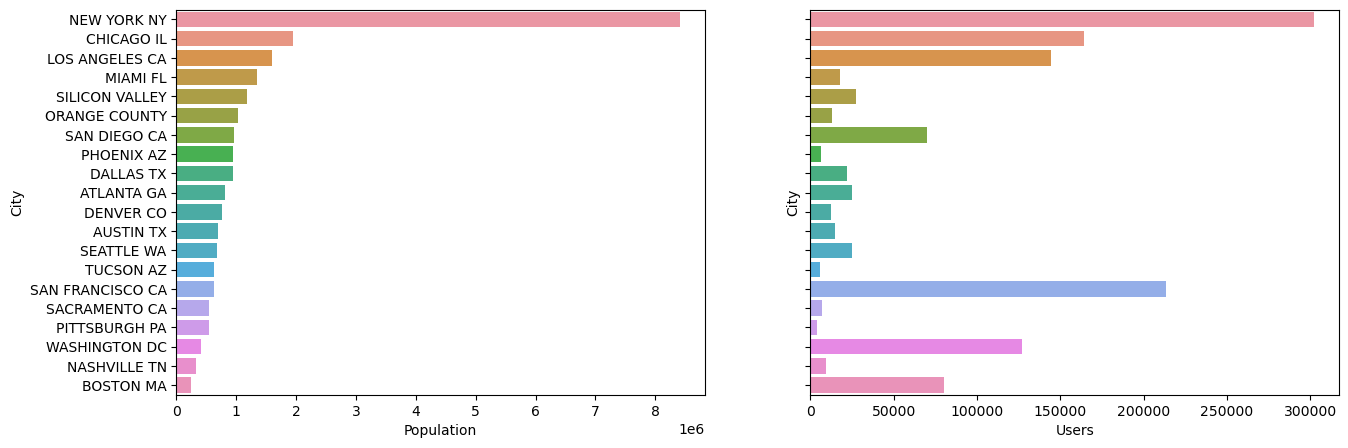

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.barplot(y='City',x='Population',data=city,ax=axes[0])
sns.barplot(y='City',x='Users',data=city,ax=axes[1])

#numbers of users does not totally dependent on number of population

<AxesSubplot:title={'center':' USER PRESENCE CITY WISE'}, ylabel='Users'>

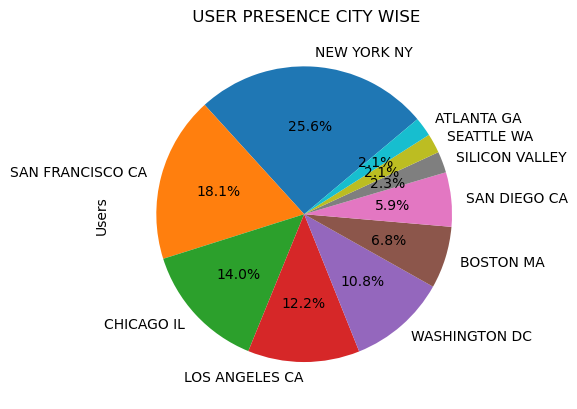

In [10]:
#percentage of overall users
plt.title(" USER PRESENCE CITY WISE")
city.groupby("City")["Users"].sum().sort_values(ascending=False).head(10).plot(kind='pie',startangle=40,autopct='%1.1f%%')

as the newyork city has most population it is expected the user is higher than other city

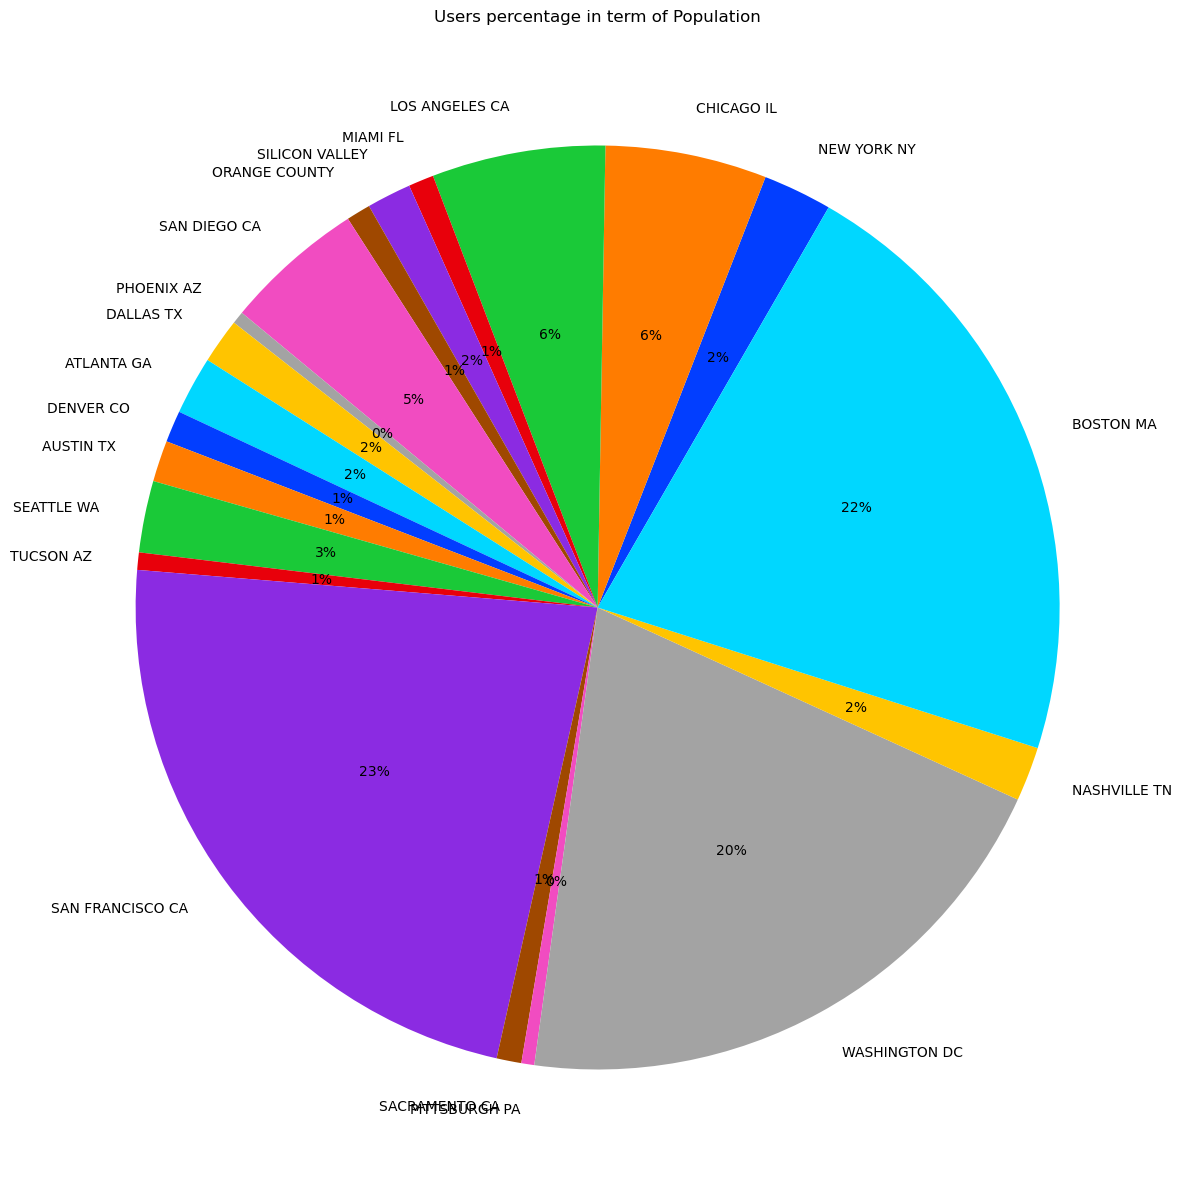

In [11]:
#converstion of users in term of population

plt.figure(figsize=(15,15))
palette_color = sns.color_palette('bright')
  
plt.pie(x=city['User_per'],labels=city["City"], colors=palette_color,startangle=60, autopct='%.0f%%' )
plt.title("Users percentage in term of Population")
plt.show()

#3 cities have users_percentage(conversion rate) more than 20 percent. it means this city have using cab more than other cities

In [12]:
trans_dat=pd.read_csv('Transaction_ID.csv')

In [13]:
trans_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


#no null values in dataset

In [14]:
customer_data=pd.read_csv('Customer_ID.csv')

In [15]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [16]:
#merge Customer dataset and transaction data set

cus_tran_data=pd.merge(customer_data,trans_dat,on='Customer ID')

In [17]:
cus_tran_data.isna().sum()
#no null values
cus_tran_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440098 entries, 0 to 440097
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Customer ID         440098 non-null  int64 
 1   Gender              440098 non-null  object
 2   Age                 440098 non-null  int64 
 3   Income (USD/Month)  440098 non-null  int64 
 4   Transaction ID      440098 non-null  int64 
 5   Payment_Mode        440098 non-null  object
dtypes: int64(4), object(2)
memory usage: 23.5+ MB


In [18]:
cus_tran_data

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode
0,29290,Male,28,10813,10000011,Card
1,29290,Male,28,10813,10351127,Cash
2,29290,Male,28,10813,10412921,Card
3,27703,Male,27,9237,10000012,Card
4,27703,Male,27,9237,10320494,Card
...,...,...,...,...,...,...
440093,12490,Male,33,18713,10439799,Cash
440094,14971,Male,30,15346,10439820,Card
440095,41414,Male,38,3960,10439838,Card
440096,41677,Male,23,19454,10439840,Cash


<AxesSubplot:xlabel='Gender', ylabel='count'>

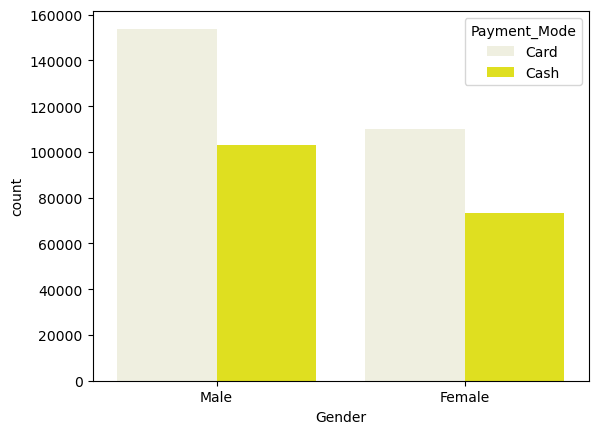

In [19]:
sns.countplot(x='Gender',hue='Payment_Mode',data=cus_tran_data,color='yellow')

#male users are tend to use card as a payment method.

<AxesSubplot:xlabel='Gender', ylabel='Income (USD/Month)'>

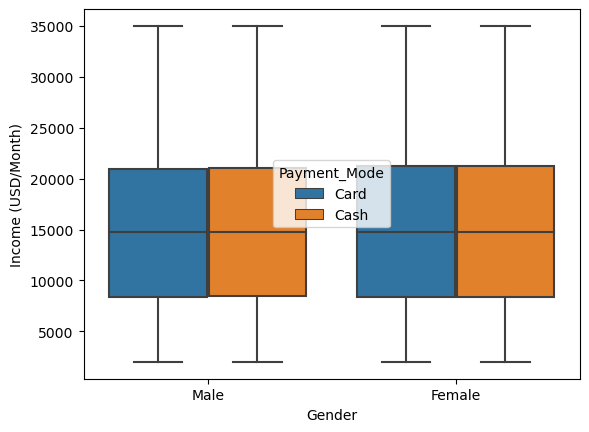

In [20]:
sns.boxplot(x='Gender',y='Income (USD/Month)',hue='Payment_Mode',data=cus_tran_data,)

#average income of the user is near 15000

In [21]:
cab_data=pd.read_csv('Cab_Data.csv')

In [22]:
cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


#calculated the benifits of each transection

In [23]:
cab_data['earn']=cab_data['Price Charged']-cab_data['Cost of Trip']

In [24]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,earn
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844


In [25]:
cab_data.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,earn
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113,137.253198
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661,160.311840
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000,-220.060000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000,28.012000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000,81.962000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200,190.030000
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000,1463.966000


findings:
1. here we can see average earn per trip, min earning and max earning per trip. 
2. from the 50% of the trip Company earn almost 82 dollars.

In [26]:
#total overviw of merged dataset

overall_data=pd.merge(cab_data,cus_tran_data,on='Transaction ID')

In [27]:
overall_data.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
earn                  0
Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
Payment_Mode          0
dtype: int64

total data set have no null values.

In [28]:
overall_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  int64  
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   earn                359392 non-null  float64
 8   Customer ID         359392 non-null  int64  
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
 12  Payment_Mode        359392 non-null  object 
dtypes: float64(4), int64(5), object(4)
memory usage: 38.4+ MB


In [29]:
overall_data.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,earn,Customer ID,Age,Income (USD/Month)
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113,137.253198,19191.652115,35.336705,15048.822937
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661,160.311840,21012.412463,12.594234,7969.409482
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000,-220.060000,1.000000,18.000000,2000.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000,28.012000,2705.000000,25.000000,8424.000000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000,81.962000,7459.000000,33.000000,14685.000000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200,190.030000,36078.000000,42.000000,21035.000000
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000,1463.966000,60000.000000,65.000000,35000.000000


In [30]:
most_tran=overall_data.groupby(['Company','City'],as_index=False).count().sort_values(by='Transaction ID',ascending=False)
most_tran.columns

Index(['Company', 'City', 'Transaction ID', 'Date of Travel', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'earn', 'Customer ID', 'Gender', 'Age',
       'Income (USD/Month)', 'Payment_Mode'],
      dtype='object')

In [31]:
most_tran=most_tran[['Company', 'City', 'Transaction ID']]
most_tran.head(5)

,Company,City,Transaction ID
28,Yellow Cab,NEW YORK NY,85918
22,Yellow Cab,CHICAGO IL,47264
37,Yellow Cab,WASHINGTON DC,40045
25,Yellow Cab,LOS ANGELES CA,28168
21,Yellow Cab,BOSTON MA,24506


<AxesSubplot:xlabel='Transaction ID', ylabel='City'>

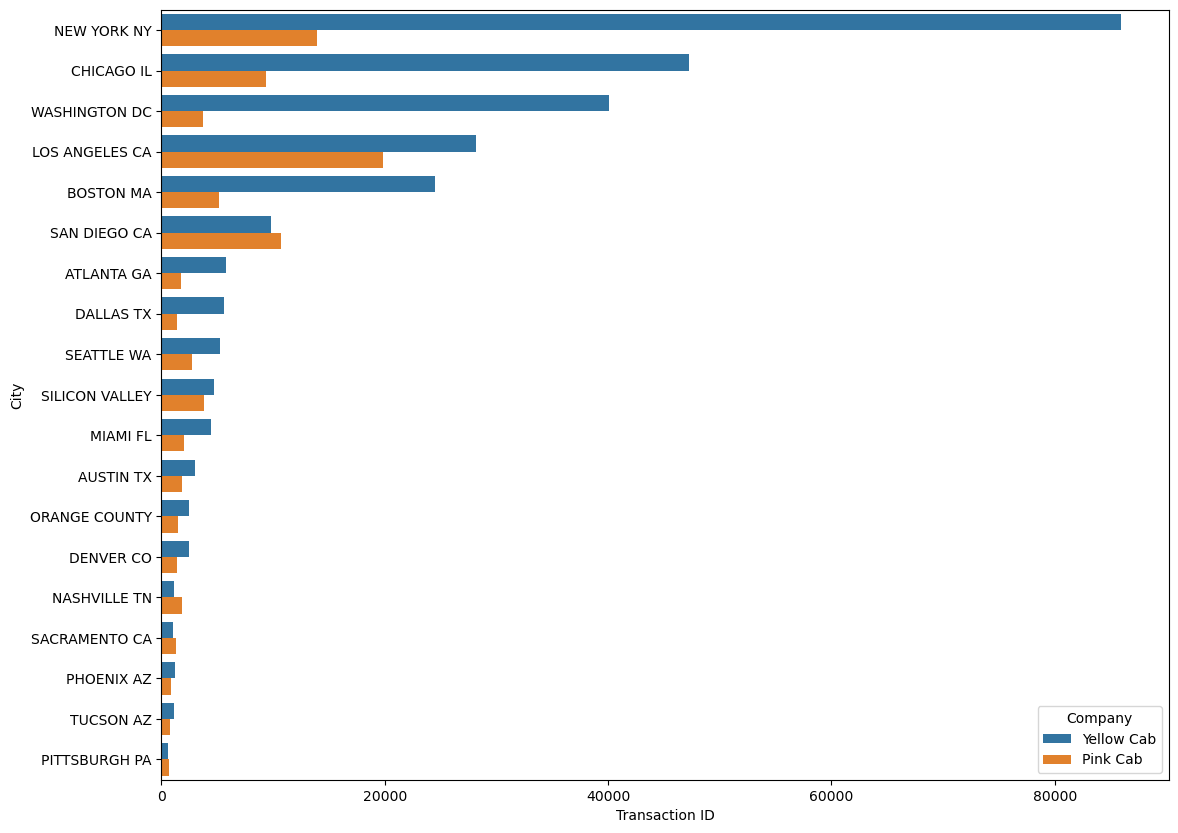

In [32]:
#transextion of both cab in all the city

plt.figure(figsize=(13,10))
sns.barplot(x='Transaction ID',y='City',hue='Company',data=most_tran)

#we see that in almos all city yellow cab has more transection records than pink cab

In [33]:
overall_data.corr()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,earn,Customer ID,Age,Income (USD/Month)
Transaction ID,1.000000,0.993030,-0.001429,-0.052902,-0.003462,-0.087130,-0.016912,-0.001267,-0.001570
Date of Travel,0.993030,1.000000,-0.001621,-0.055559,-0.004484,-0.090672,-0.017653,-0.001346,-0.001368
KM Travelled,-0.001429,-0.001621,1.000000,0.835753,0.981848,0.462768,0.000389,-0.000369,-0.000544
Price Charged,-0.052902,-0.055559,0.835753,1.000000,0.859812,0.864154,-0.177324,-0.003084,0.003228
Cost of Trip,-0.003462,-0.004484,0.981848,0.859812,1.000000,0.486056,0.003077,-0.000189,-0.000633
earn,-0.087130,-0.090672,0.462768,0.864154,0.486056,1.000000,-0.306527,-0.005093,0.006148
Customer ID,-0.016912,-0.017653,0.000389,-0.177324,0.003077,-0.306527,1.000000,-0.004735,-0.013608
Age,-0.001267,-0.001346,-0.000369,-0.003084,-0.000189,-0.005093,-0.004735,1.000000,0.003907
Income (USD/Month),-0.001570,-0.001368,-0.000544,0.003228,-0.000633,0.006148,-0.013608,0.003907,1.000000


<AxesSubplot:>

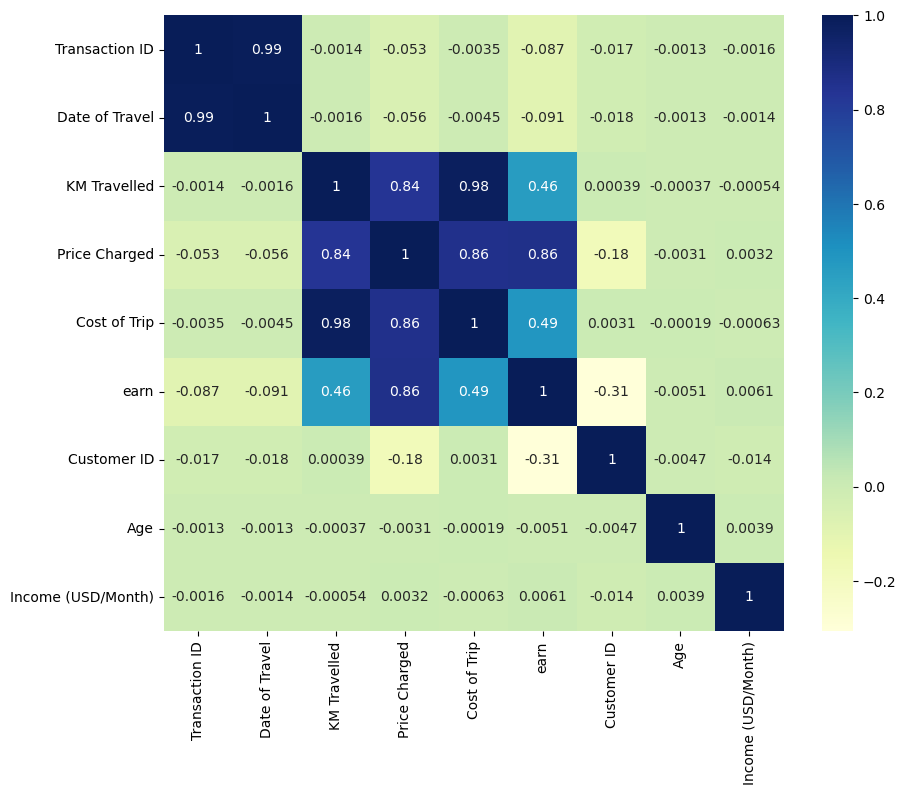

In [34]:
plt.figure(figsize=(10,8))
sns.heatmap(data=overall_data.corr(),annot=True,cmap='YlGnBu')

#we found one suittsble correlation between priced charged and earn. the more the charging price the more earn from the trip

<AxesSubplot:xlabel='earn', ylabel='Price Charged'>

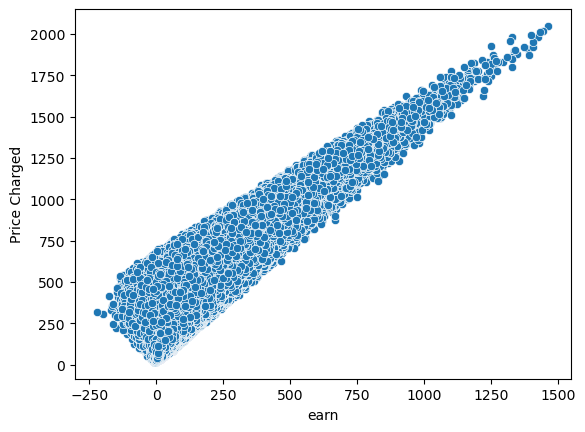

In [35]:
#relation between price charged and earn

sns.scatterplot(x='earn',y='Price Charged',data=overall_data)

positive relation: the more price charged the more average income increased.

<AxesSubplot:xlabel='Company', ylabel='count'>

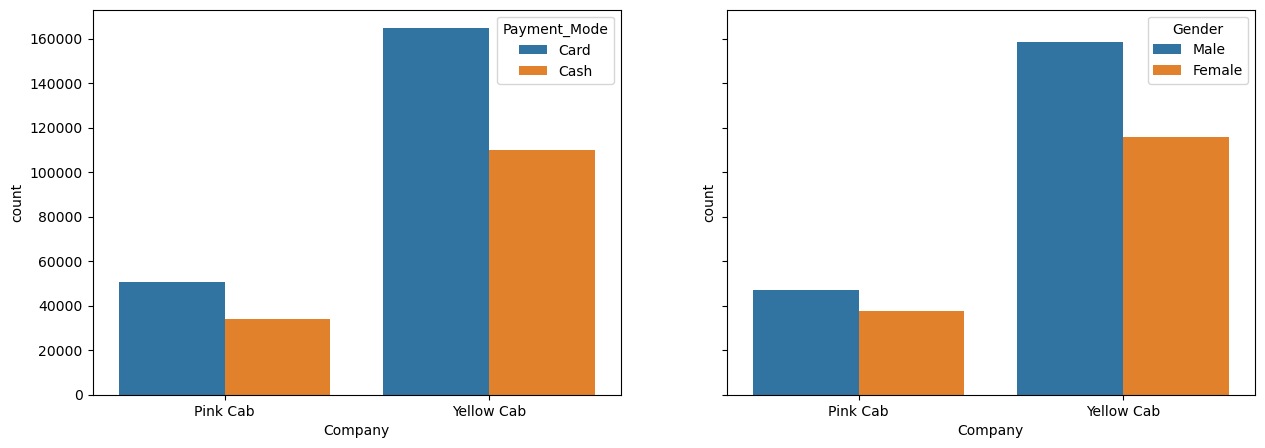

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.countplot(x=overall_data["Company"],hue=overall_data['Payment_Mode'],ax=axes[0])
sns.countplot(x=overall_data["Company"],hue=overall_data['Gender'],ax=axes[1])


In [37]:
overall_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,earn,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,29290,Male,28,10813,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,27703,Male,27,9237,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680,28712,Male,53,11242,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980,28020,Male,23,23327,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440,27182,Male,33,8536,Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800,52392,Male,24,15651,Cash
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020,53286,Male,32,6528,Cash
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200,52265,Male,56,7966,Cash
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420,52175,Male,32,6423,Card


In [38]:

# changing the Ms excel serial number into real Time_Date

import xlrd
overall_data['Date of Travel'] = overall_data['Date of Travel'].apply(lambda s: xlrd.xldate.xldate_as_datetime(s, 0))


# Extracting the month and year from the travel date column and year column

overall_data['Travel_year_Month'] = pd.to_datetime(overall_data['Date of Travel']).dt.to_period('M')
overall_data['Travel_year']=pd.DatetimeIndex(overall_data['Date of Travel']).year
overall_data['Travel_month']=pd.DatetimeIndex(overall_data['Date of Travel']).month
overall_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,earn,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Travel_year_Month,Travel_year,Travel_month
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,29290,Male,28,10813,Card,2016-01,2016,1
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,27703,Male,27,9237,Card,2016-01,2016,1
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680,28712,Male,53,11242,Cash,2016-01,2016,1
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980,28020,Male,23,23327,Cash,2016-01,2016,1
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440,27182,Male,33,8536,Card,2016-01,2016,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800,52392,Male,24,15651,Cash,2018-01,2018,1
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020,53286,Male,32,6528,Cash,2018-01,2018,1
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200,52265,Male,56,7966,Cash,2018-01,2018,1
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420,52175,Male,32,6423,Card,2018-01,2018,1


Text(0.5, 1.0, 'Average earn per month for the company')

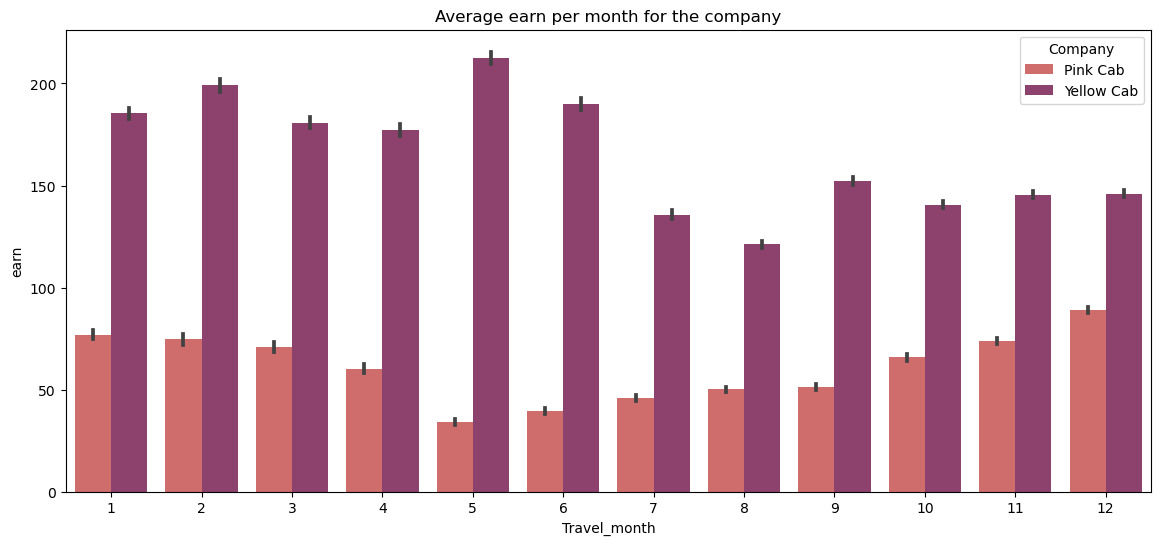

In [39]:
#earn by month in both company
plt.figure(figsize=(14,6))
sns.barplot(x='Travel_month',y='earn',hue='Company',data=overall_data,palette='flare')
plt.title("Average earn per month for the company")


Text(0.5, 1.0, 'Average earn per Year for the company')

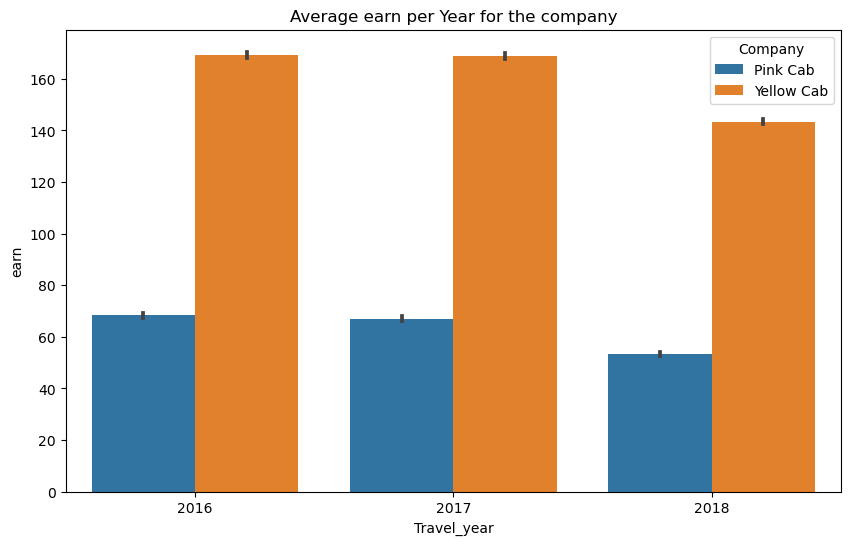

In [40]:
#earn by company by year
plt.figure(figsize=(10,6))
sns.barplot(x='Travel_year',y='earn',hue='Company',data=overall_data)
plt.title("Average earn per Year for the company")

#we can see that yellow cab earning is much much higher than pink cab in term of month and yearly basis

In [41]:
overall_data.groupby(['Company','Payment_Mode'])['earn'].sum()

Company     Payment_Mode
Pink Cab    Card            3.180603e+06
            Cash            2.126726e+06
Yellow Cab  Card            2.636208e+07
            Cash            1.765830e+07
Name: earn, dtype: float64

<AxesSubplot:ylabel='earn'>

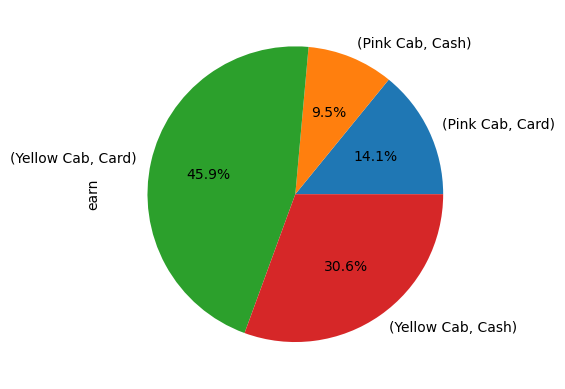

In [42]:
#overview of payment and comopannu
overall_data.groupby(['Company','Payment_Mode'])['earn'].count().plot(kind='pie',y='Payment_Mode',autopct='%1.1f%%')


findings:
1.yellow cab user who paid by card=45.9%
2. yellow cab user who paid by cash=30.6%
3. pink cab user who paid by card=14.1%
4. pink cab user who paid by cash=9.5%
almost 70% users for yellow cab


<AxesSubplot:ylabel='earn'>

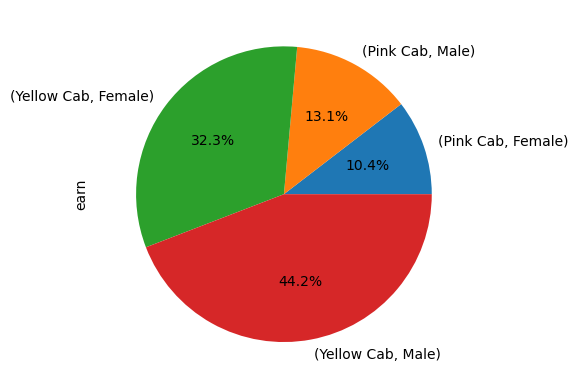

In [43]:
overall_data.groupby(['Company','Gender'])['earn'].count().plot(kind='pie',y='Gender',autopct='%1.1f%%')


findings:
1. male yellow cab user=44.2%
2. female yellow cab user=32.3%
3. male pink cab users=13.1%
4. female pink cab users=10.4%

In [62]:
#profit earned by company

profit_per=overall_data[['Company','earn','Gender']]
#profit_per
#profit_per.groupby(['Company','Gender']).sum()

<AxesSubplot:xlabel='Company,Gender'>

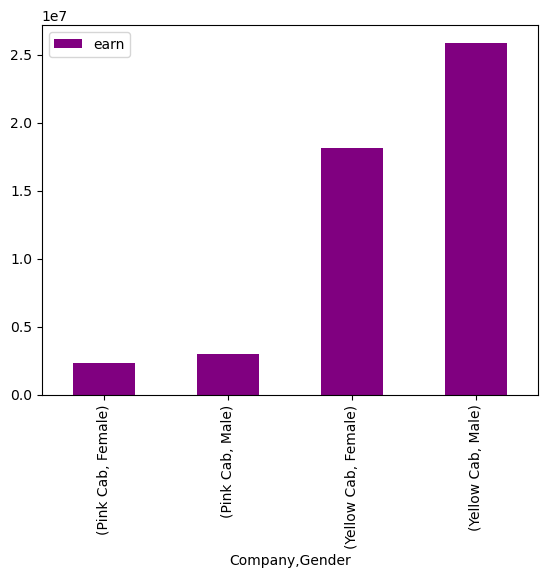

In [61]:
profit_per.groupby(['Company','Gender'],).sum().plot(kind='bar', color = ['purple'],)

#male and females both tends to spend more on yellow cab than pink cab

In [46]:
overall_data[['Company','City',]][overall_data['Company']=='Pink Cab']['City'].nunique()


19

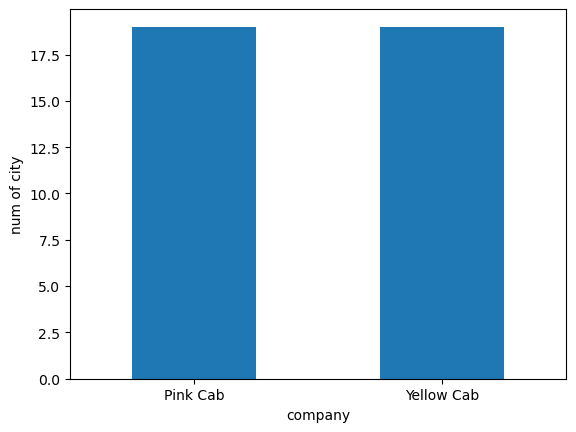

In [47]:
#how many citys are captured by each company
pt = overall_data.pivot_table(index='Company', values='City', aggfunc='nunique')

# plot the bar cart
ax = pt.plot(kind='bar', rot=0, ylabel='num of city', xlabel='company', legend=False)

#both captured same number of cities 19

<AxesSubplot:xlabel='Travel_month', ylabel='earn'>

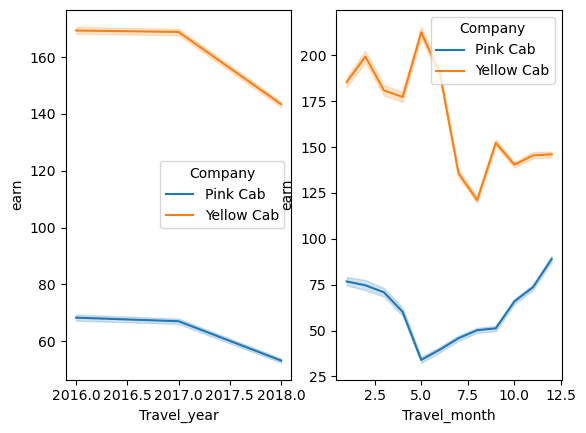

In [48]:
plt.subplots(1,2)
sns.lineplot(x='Travel_month',y='earn',hue='Company',data=overall_data)
plt.subplot(1,2,1)
sns.lineplot(x='Travel_year',y='earn',hue='Company',data=overall_data)
plt.subplot(1,2,2)


##yearly and monthly earn for both comapany

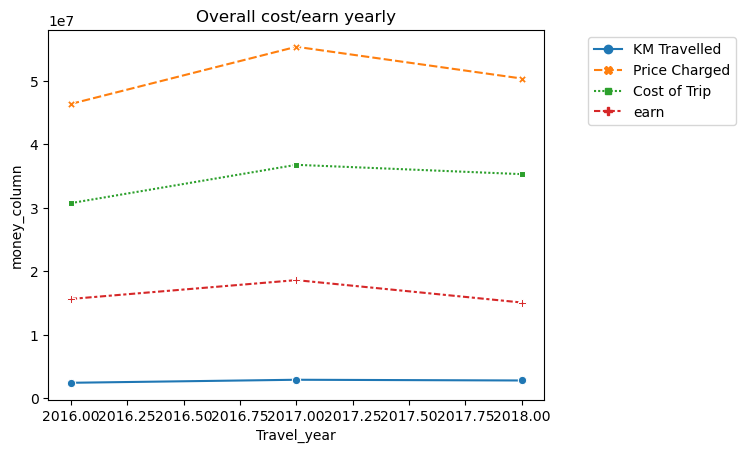

In [60]:
x=overall_data[['Company','Travel_year','KM Travelled',
       'Price Charged', 'Cost of Trip', 'earn']]
x=x.groupby('Travel_year').sum()
x
#x.plot(x='Travel_year',y=['KM Travelled','Price Charged','Cost of Trip'],kind='line',markers=True)
sns.lineplot(data=x,markers=True,)
plt.ylabel('money_column')
plt.title('Overall cost/earn yearly')
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))

##for each comapny when cost of trip increased they started increasing the charge to maintain the average earnings per KM.

#Overall findings:

1. Yellow cab earn more profits over the year and month basis
2. both male and female used yellow cab than pink cab
3. profit from every ride in the yellow cab more than twice of pink cabe
4. both captured same ammount of city where yellow cab are more available than pink cab
5. users tends to pay cash 
6. average age of user are 35 years old
7. average income for users 15000 per month who are using cab services
8. san fransisco is the city where the percentage of cab users are most in term of population.
9. though the cost per KM is almost same for both company still yellow cab charging more than twice and users are accepting this

from all the finding 
i can say that the company xzy should invest in the yellow cab.

